$$y'' - P(x)y = f(x)$$
$$P(x) = 10 + \sin(2 \pi x) > 0$$
$$f(x) = \cos( 2 \pi x)$$

Решение имеет период равный $1$. Найдём это решение с шагом $h = 0.005$. Тогда за период $N = 200$.

Для отыскания решения будем использовать разностную схему:

$$\begin{cases}
    \frac{y_1 - 2y_0 + y_{N-1}}{h^2}-P(0)y_0 = f(0) \\
    \frac{y_{n+1} - 2y_n + y_{n-1}}{h^2}-P(nh)y_n = f(nh), 0 < n < N - 1 \\
    \frac{y_0 - 2y_{N-1} + y_{N-2}}{h^2}-P(1-h)y_{N-1} = f(1-h)
\end{cases}$$

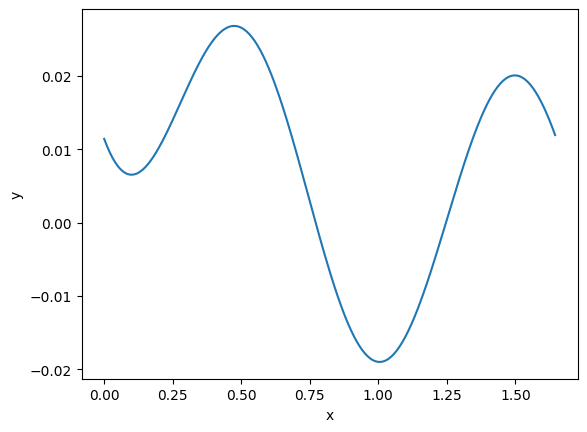

In [2]:
import matplotlib.pyplot as plt
from ODElib import *
from math import *

def show_result(xs : list[float], ys : list[float]):
    plt.plot(xs, ys)
    plt.xlabel("x")
    plt.ylabel("y")

def P(x):
    return 10 + sin(2*pi*x)

def f(x):
    return cos(2 * pi * x)

h = 0.005
N = 330

ACs = [1/h/h for n in range(N)]
Bs = [-2/h/h - P(n*h) for n in range(N)]
fs = Vector([f(n*h) for n in range(N)])

ys = LinearSolver.solve_cyclic_tridiagonal(ACs, Bs, ACs, fs).toList()
show_result([n*h for n in range(N)], ys)